# Домашнее задание

В этом домашнем задании предлагаем вам попрактиковаться в прогнозировании стоимости биткоина при помощи линейной регрессии.

In [39]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

In [ ]:


data = pd.read_csv("https://raw.githubusercontent.com/aiedu-courses/stepik_applied_tasks/main/datasets/BTC_5min_sample.csv",
                   parse_dates=True,
                   index_col='timestamp'
                  )

data.head()

Будем прогнозировать стоимость биткоина на момент открытия торгов (`open`).

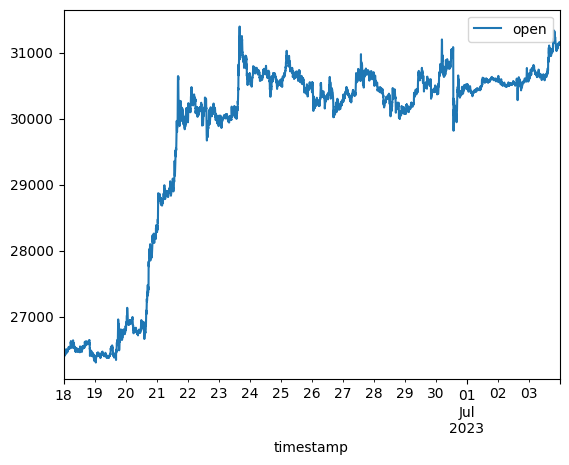

In [2]:
data_open = data[['open']]

data_open.plot()
plt.show()

In [3]:
data_open

,open
timestamp,
2023-06-18 00:00:00,26519.10
2023-06-18 00:05:00,26508.01
2023-06-18 00:10:00,26511.30
2023-06-18 00:15:00,26519.44
2023-06-18 00:20:00,26513.33
...,...
2023-07-03 23:35:00,31126.23
2023-07-03 23:40:00,31127.02
2023-07-03 23:45:00,31136.55


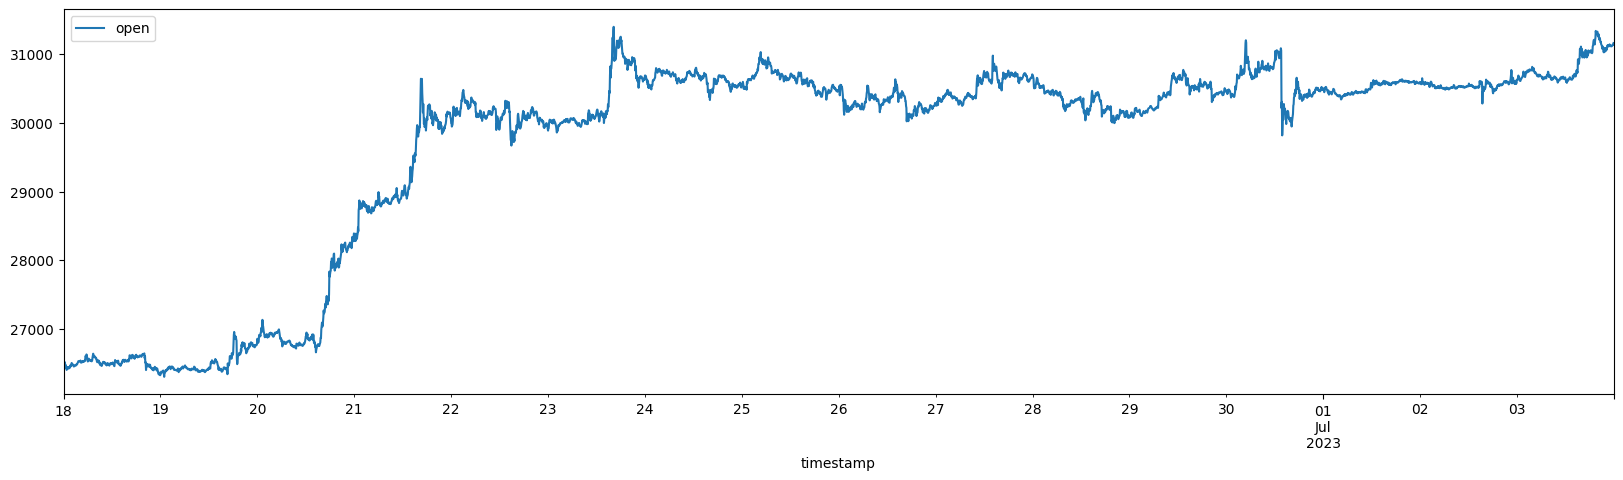

In [4]:
data_open.plot(figsize=(20,5));

Проделайте следующие шаги:

* Разбейте данные на тренировочную и тестовую часть. В тест отправьте 15% данных

* Извлеките лаговые признаки

* Извлеките агрегированные признаки (средняя стоимость за день, час)

Рекомендуется использовать функцию preprocess_data с вебинара (однако, надо будет незначительно ее поменять, исходя из данных задачи).

Задайте гиперпараметры по умолчанию (в функции preprocess_data, если будете использовать ее):
* `lag_start`=5
* `lag_end`=20
* `test_size`=0.15

In [7]:
data

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204
...,...,...,...,...,...
2023-07-03 23:35:00,31126.23,31163.0,31118.99,31126.93,24.7985
2023-07-03 23:40:00,31127.02,31163.0,31120.30,31136.55,28.1264
2023-07-03 23:45:00,31136.55,31156.0,31120.30,31134.78,44.0049


In [8]:
data.shift(1)

,open,high,low,close,volume
timestamp,,,,,
2023-06-18 00:00:00,NaN,NaN,NaN,NaN,NaN
2023-06-18 00:05:00,26519.10,26542.5,26501.76,26515.80,35.4498
2023-06-18 00:10:00,26508.01,26535.0,26506.13,26511.30,7.4262
2023-06-18 00:15:00,26511.30,26551.0,26508.77,26519.62,18.9461
2023-06-18 00:20:00,26519.44,26550.0,26464.43,26511.99,89.2364
...,...,...,...,...,...
2023-07-03 23:35:00,31117.26,31154.0,31106.40,31126.23,42.7557
2023-07-03 23:40:00,31126.23,31163.0,31118.99,31126.93,24.7985
2023-07-03 23:45:00,31127.02,31163.0,31120.30,31136.55,28.1264


In [10]:
def code_mean(data, cat_feature, real_feature):
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [57]:
data_open['date'] = data_open.index.date

/tmp/ipykernel_11695/3162037148.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_open['date'] = data_open.index.date


In [61]:
data_open.groupby('date')['open'].mean()

date
2023-06-18    26515.098542
2023-06-19    26510.399653
2023-06-20    27201.300417
2023-06-21    29302.246979
2023-06-22    30110.849201
2023-06-23    30352.407917
2023-06-24    30635.585451
2023-06-25    30630.126354
2023-06-26    30288.353576
2023-06-27    30535.091597
2023-06-28    30303.848542
2023-06-29    30409.301042
2023-06-30    30567.799306
2023-07-01    30512.006528
2023-07-02    30541.364583
2023-07-03    30829.732917
Name: open, dtype: float64

In [62]:
dict(data_open.groupby('date')['open'].mean())

{datetime.date(2023, 6, 18): 26515.098541666666,
 datetime.date(2023, 6, 19): 26510.399652777778,
 datetime.date(2023, 6, 20): 27201.300416666665,
 datetime.date(2023, 6, 21): 29302.24697916667,
 datetime.date(2023, 6, 22): 30110.84920138889,
 datetime.date(2023, 6, 23): 30352.407916666667,
 datetime.date(2023, 6, 24): 30635.585451388888,
 datetime.date(2023, 6, 25): 30630.12635416667,
 datetime.date(2023, 6, 26): 30288.35357638889,
 datetime.date(2023, 6, 27): 30535.091597222225,
 datetime.date(2023, 6, 28): 30303.84854166667,
 datetime.date(2023, 6, 29): 30409.301041666666,
 datetime.date(2023, 6, 30): 30567.799305555553,
 datetime.date(2023, 7, 1): 30512.00652777778,
 datetime.date(2023, 7, 2): 30541.364583333332,
 datetime.date(2023, 7, 3): 30829.732916666668}

In [65]:
code_mean(data_open, 'date', 'open')

{datetime.date(2023, 6, 18): 26515.098541666666,
 datetime.date(2023, 6, 19): 26510.399652777778,
 datetime.date(2023, 6, 20): 27201.300416666665,
 datetime.date(2023, 6, 21): 29302.24697916667,
 datetime.date(2023, 6, 22): 30110.84920138889,
 datetime.date(2023, 6, 23): 30352.407916666667,
 datetime.date(2023, 6, 24): 30635.585451388888,
 datetime.date(2023, 6, 25): 30630.12635416667,
 datetime.date(2023, 6, 26): 30288.35357638889,
 datetime.date(2023, 6, 27): 30535.091597222225,
 datetime.date(2023, 6, 28): 30303.84854166667,
 datetime.date(2023, 6, 29): 30409.301041666666,
 datetime.date(2023, 6, 30): 30567.799305555553,
 datetime.date(2023, 7, 1): 30512.00652777778,
 datetime.date(2023, 7, 2): 30541.364583333332,
 datetime.date(2023, 7, 3): 30829.732916666668}

In [71]:
arr = [0,1,2]
func = lambda x: x**2

list(map(func, arr))

[0, 1, 4]

In [75]:
list(map(dict(data_open.groupby('date')['open'].mean()).get, data_open['date']))

[26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541666666,
 26515.098541

In [85]:
data

,open,high,low,close,volume,date
timestamp,,,,,,
2023-06-18 00:00:00,26519.10,26542.5,26501.76,26515.80,35.4498,2023-06-18
2023-06-18 00:05:00,26508.01,26535.0,26506.13,26511.30,7.4262,2023-06-18
2023-06-18 00:10:00,26511.30,26551.0,26508.77,26519.62,18.9461,2023-06-18
2023-06-18 00:15:00,26519.44,26550.0,26464.43,26511.99,89.2364,2023-06-18
2023-06-18 00:20:00,26513.33,26541.0,26414.28,26439.52,90.0204,2023-06-18
...,...,...,...,...,...,...
2023-07-03 23:35:00,31126.23,31163.0,31118.99,31126.93,24.7985,2023-07-03
2023-07-03 23:40:00,31127.02,31163.0,31120.30,31136.55,28.1264,2023-07-03
2023-07-03 23:45:00,31136.55,31156.0,31120.30,31134.78,44.0049,2023-07-03


In [103]:
len(data)

4608

In [92]:
def preprocess_data(data, lag_start=5, lag_end=20, test_size=0.15):
    data = pd.DataFrame(data.copy())
    
    # data_open = data[['open','date']].copy()
    data_open = data[['open']].copy()
    
    for i in range(lag_start, lag_end):
        data_open[f"open_lag_{i}"] = data_open['open'].shift(i)

    data_open = data_open.dropna()
    ix_cut = int(np.around((len(data_open.index) - lag_start)*(1 - test_size), 0))
    date_cut = data_open.index[ix_cut].date()

    # data_open["open_day_mean"] = list(map(dict(data_open.loc[:date_cut].groupby('date')['open'].mean()).get, data_open['date']))
    # data_open.drop(columns=['date'])
    
    X_train = data_open.loc[:date_cut].drop(["open"], axis=1)
    y_train = data_open.loc[:date_cut]["open"]
    X_test = data_open.loc[date_cut:].drop(["open"], axis=1)
    y_test = data_open.loc[date_cut:]["open"]

    # return data_open
    return X_train, X_test, y_train, y_test

In [93]:
X_train, X_test, y_train, y_test = preprocess_data(data, lag_start=5, lag_end=20)

In [94]:
X_test

,open_lag_5,open_lag_6,open_lag_7,open_lag_8,open_lag_9,open_lag_10,open_lag_11,open_lag_12,open_lag_13,open_lag_14,open_lag_15,open_lag_16,open_lag_17,open_lag_18,open_lag_19
timestamp,,,,,,,,,,,,,,,
2023-07-01 00:00:00,30520.76,30496.45,30492.16,30477.46,30457.14,30458.49,30459.88,30476.21,30465.47,30476.48,30494.57,30506.61,30479.23,30508.90,30488.31
2023-07-01 00:05:00,30477.63,30520.76,30496.45,30492.16,30477.46,30457.14,30458.49,30459.88,30476.21,30465.47,30476.48,30494.57,30506.61,30479.23,30508.90
2023-07-01 00:10:00,30505.30,30477.63,30520.76,30496.45,30492.16,30477.46,30457.14,30458.49,30459.88,30476.21,30465.47,30476.48,30494.57,30506.61,30479.23
2023-07-01 00:15:00,30492.10,30505.30,30477.63,30520.76,30496.45,30492.16,30477.46,30457.14,30458.49,30459.88,30476.21,30465.47,30476.48,30494.57,30506.61
2023-07-01 00:20:00,30491.70,30492.10,30505.30,30477.63,30520.76,30496.45,30492.16,30477.46,30457.14,30458.49,30459.88,30476.21,30465.47,30476.48,30494.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-07-03 23:35:00,31126.09,31125.22,31117.65,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01,31050.74
2023-07-03 23:40:00,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14,31088.01
2023-07-03 23:45:00,31118.32,31112.00,31126.09,31125.22,31117.65,31140.58,31114.47,31113.27,31110.07,31112.79,31130.60,31119.01,31120.05,31072.93,31058.14


Обучите линейную регрессию с гиперпараметрами по умолчанию на тренировочных данных и вычислите ошибку MAE на тестовых данных.

Чему она получилась равна? (Ответ округлите до целого числа).

Также нарисуйте график правильного ответа и прогноза на тесте.

In [95]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [96]:
preds = lr.predict(X_test)

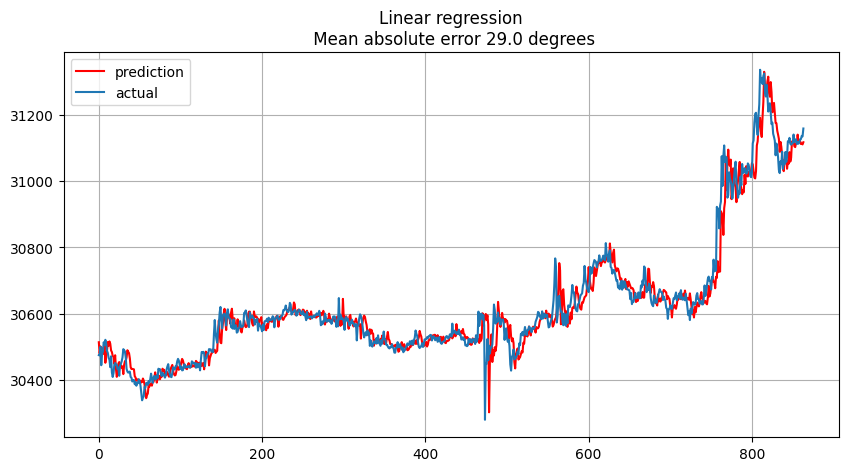

In [102]:
plt.figure(figsize=(10, 5))
plt.plot(preds, "r", label="prediction")
plt.plot(y_test.values, label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n Mean absolute error {np.around(mean_absolute_error(preds, y_test))} degrees");
# plt.title(f"Linear regression\n mean_absolute_percentage_error {mean_absolute_percentage_error(preds, y_test)*100} %");

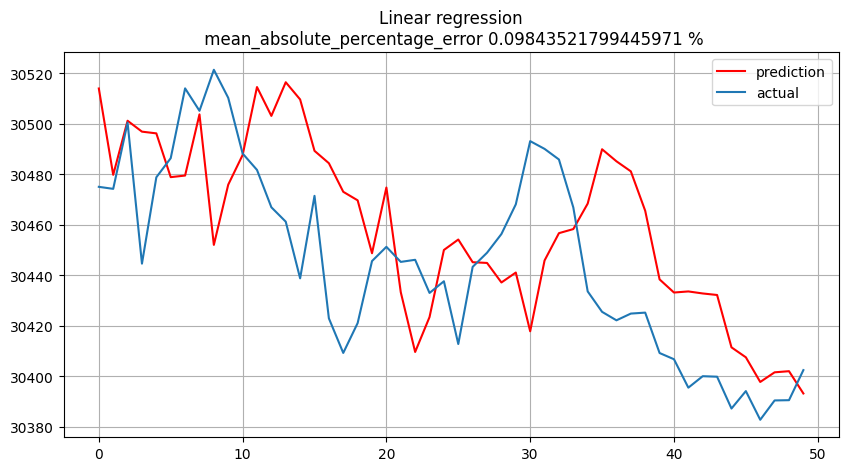

In [101]:
test_ix_cut = 50

plt.figure(figsize=(10, 5))
plt.plot(preds[:test_ix_cut], "r", label="prediction")
plt.plot(y_test.values[:test_ix_cut], label="actual")
plt.grid(True)
plt.legend(loc="best")
plt.title(f"Linear regression\n mean_absolute_percentage_error {mean_absolute_percentage_error(preds[:test_ix_cut], y_test[:test_ix_cut])*100} %");

Попробуйте подобрать гиперпараметры `lag_start`, `lag_end`, а также придумать новые полезные агрегрированные признаки для улучшения качества прогноза.

Пропорции разбиения (в тесте 15% данных) не трогайте. Ошибку MAE все так же считайте на тесте.